<center><h1>DATAJAM.AI FASHIONMNIST - COMPARATOR - <a style="color:pink">PRO VERSION</a> -</h1></center>

<img src="https://i.ibb.co/zJyLQ0s/Screen-Shot-2019-07-20-at-22-42-19.png" style="width:300px">

# 1) Please never forget this MEME

<img src="https://image-store.slidesharecdn.com/65407daf-f05b-4fa2-8590-4e964b0bfd58-large.jpeg" style="width:400px"></img>

# 2) Data preparation

## a) tidy up the folders

In [ ]:
cd /Users/assansanogo/Downloads/DATAJAM_RESSOURCES

In [ ]:
CATEGORIES = ["dog","cat"]
TRAIN_PATH="./train"
OUTPUT_PATH_TRAIN="./training_set"
OUTPUT_PATH_VAL="./validation_set"
COLUMNS= ["file_path","category"]
BATCH_SIZE=32

In [ ]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
(x_train, y_train), (x_test, y_test) = (x_train[:1000], y_train[:1000]), (x_test[:1000], y_test[:1000])

In [ ]:
categories =  np.unique(y_train).size

In [ ]:
ratio = 0.8

In [ ]:
def represent_picture(x,y):
    an_im = plt.imshow(x, cmap='gray')
    plt.title(y)
    plt.show()

In [ ]:
represent_picture(x_train[0],y_train[0])

In [ ]:
def resize_me(x):
    res= cv2.resize(x,(224,224),cv2.INTER_CUBIC)
    return(cv2.merge([res,res,res]))


In [ ]:
l=[]
for el in tqdm(x_train):
    l.append(resize_me(el))


In [ ]:
x_train_new = np.array(l)

In [ ]:
represent_picture(x_train_new[0],y_train[0])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator()

In [ ]:
train_data, train_labels= x_train_new[:int(ratio*x_train.shape[0])],y_train[:int(ratio*x_train.shape[0])]
val_data, val_labels= x_train_new[int(ratio*x_train.shape[0]):],y_train[int(ratio*x_train.shape[0]):]


In [ ]:
train_labels.shape

# 3) Model construction (model created from scratch)

In [4]:
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers.core import *
from keras.layers import *
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import plot_model


from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input



from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

Using TensorFlow backend.


In [17]:
def get_my_model(categories=10, size=(224,224,3)):
    # define two sets of inputs
    inputA = Input(shape=(32,))
    inputB = Input(shape=(128,))

    # the first branch operates on the first input
    x_left = Dense(8, activation="relu")(inputA)
    y_left = Dense(8, activation="relu")(inputB)
    combined= Add()([x_left,y_left])
    x = Dense(categories, activation="relu")(combined)
    x = Model(inputs=[inputA,inputB], outputs=x)
    print(x.summary())
    return(x)
 

In [19]:
my_comparator = get_my_model(categories=10, size=(224,224,3))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           (None, 128)          0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 8)            264         input_15[0][0]                   
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 8)            1032        input_16[0][0]                   
__________________________________________________________________________________________________
add_5 (Add

In [21]:
#save the model
plot_model(my_comparator, to_file='./fashion_MNIST_Comparator_model.png')

In [29]:
#visualize the model architecture

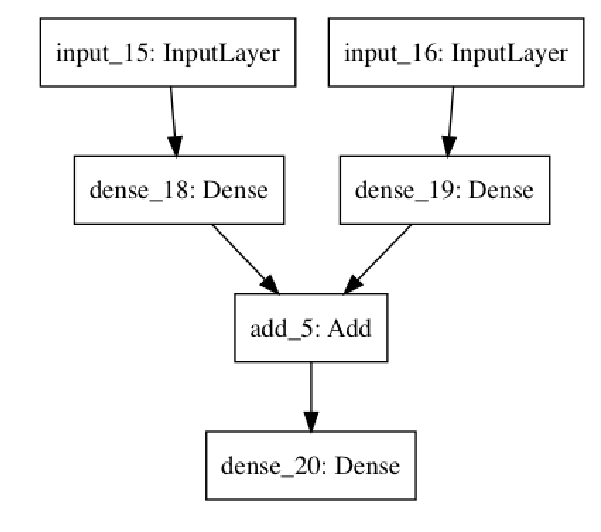

In [30]:
comp_im = plt.imread('./fashion_MNIST_Comparator_model.png')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(comp_im)
plt.show()

In [ ]:
# a CNN architecture based on VGG16
def get_my_model(categories=10, size=(224,224,3)):


    # load the VGG16 network, ensuring the head FC layer sets are left
    # off
    baseModel = VGG16(weights="imagenet", include_top=False,
        input_tensor=Input(shape=size))

    # construct the head of the model that will be placed on top of the
    # the base model
    headModel = baseModel.output
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(512, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(categories, activation="softmax")(headModel)

    # place the head FC model on top of the base model (this will become
    # the actual model we will train)
    model = Model(inputs=baseModel.input, outputs=headModel)
    return model


In [ ]:
#save the model in a variable
fashion_mnist_1 = get_my_model(categories=10, size=(224,224,3))

In [ ]:
# get the structure of the model
fashion_mnist_1.summary()

In [ ]:
#save the model
plot_model(fashion_mnist_1, to_file='./fashion_MNIST_model.png')